In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

Using Dataset
https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [3]:
# Set paths
train_dir = '/kaggle/input/gtsrb-german-traffic-sign/Train'

# Data augmentation to handle real-world variations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    validation_split=0.2
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [4]:
# Build simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(43, activation='softmax')  # 43 classes in GTSRB
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 316s 320ms/step - accuracy: 0.2090 - loss: 2.9301 - val_accuracy: 0.4501 - val_loss: 1.7380
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 111s 113ms/step - accuracy: 0.5179 - loss: 1.5050 - val_accuracy: 0.5757 - val_loss: 1.3445
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 109s 111ms/step - accuracy: 0.6309 - loss: 1.1062 - val_accuracy: 0.6731 - val_loss: 1.0443
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 119s 121ms/step - accuracy: 0.7093 - loss: 0.8919 - val_accuracy: 0.7160 - val_loss: 0.8951
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 119s 121ms/step - accuracy: 0.7421 - loss: 0.7793 - val_accuracy: 0.7357 - val_loss: 0.8535
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 122s 125ms/step - accuracy: 0.7650 - loss: 0.6934 - val_accuracy: 0.7463 - val_loss: 0.8061
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 116s 118ms/step - accuracy: 0.7877 - loss: 0.6193 - val_accuracy: 0.7657 - val_loss: 0.7608
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 110s 112ms/step - accuracy: 0.8088 -

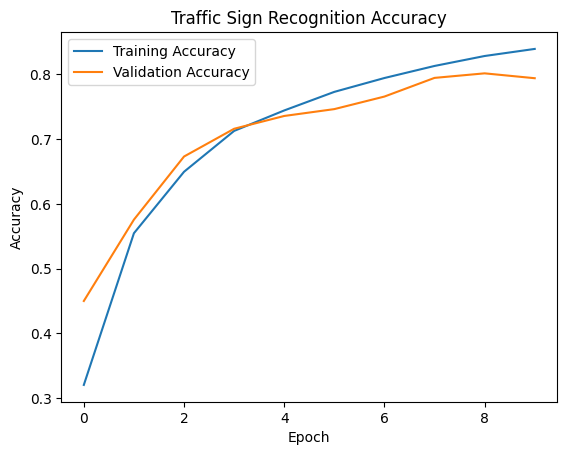

In [7]:
# Plot training results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Traffic Sign Recognition Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
# Evaluate model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")


246/246 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.7880 - loss: 0.6654
Validation Accuracy: 0.7939


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


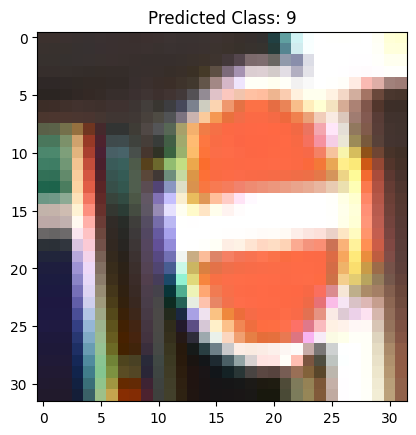

In [10]:
# Predict on a sample image
sample_image, _ = next(val_generator)
pred = model.predict(sample_image)
plt.imshow(sample_image[0])
plt.title(f"Predicted Class: {np.argmax(pred[0])}")
plt.show()